<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/LSTM_Model_on_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the Data

In [92]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('AAPL Stock Price.csv')

Check Dimensions of Data

In [64]:
df.shape

(756, 7)

In [65]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2018,42.540001,43.075001,42.314999,43.064999,41.075405,102223600
1,1/3/2018,43.132500,43.637501,42.990002,43.057499,41.068249,118071600
2,1/4/2018,43.134998,43.367500,43.020000,43.257500,41.259010,89738400
3,1/5/2018,43.360001,43.842499,43.262501,43.750000,41.728756,94640000
4,1/8/2018,43.587502,43.902500,43.482498,43.587502,41.573769,82271200


Processing the Data

In [66]:
#Check for missing values#
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [67]:
#Check for data type#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       756 non-null    object 
 1   Open       756 non-null    float64
 2   High       756 non-null    float64
 3   Low        756 non-null    float64
 4   Close      756 non-null    float64
 5   Adj Close  756 non-null    float64
 6   Volume     756 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


In [68]:
#Convert Date column into date time#
df['Date'] = pd.to_datetime(df['Date'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
 6   Volume     756 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.5 KB


In [70]:
#Make Date the Index#
df.set_index('Date', inplace=True)


In [71]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075405,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068249,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259010,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728756,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573769,82271200


In [72]:
#Sort the data#
df.sort_index(inplace=True)

In [73]:
#Normalise the data#
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [74]:
scaler_values

array([[0.0641321 , 0.06491795, 0.06894981, 0.07432581, 0.06590886,
        0.14899308],
       [0.06993779, 0.07041326, 0.07577906, 0.07425165, 0.06583805,
        0.19058211],
       [0.06996226, 0.0677755 , 0.07608256, 0.07622907, 0.06772554,
        0.11622886],
       ...,
       [1.        , 1.        , 1.        , 0.98200552, 0.98215123,
        0.19839108],
       [0.97579736, 0.97264568, 0.99048966, 0.97063548, 0.97087333,
        0.13384725],
       [0.9610994 , 0.96043388, 0.97349256, 0.96045184, 0.96077215,
        0.14083955]])

In [75]:
#put in dataframe#
df_scaled = pd.DataFrame(scaler_values, columns=df.columns, index=df.index)

In [76]:
df_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,0.064132,0.064918,0.068950,0.074326,0.065909,0.148993
2018-01-03,0.069938,0.070413,0.075779,0.074252,0.065838,0.190582
2018-01-04,0.069962,0.067776,0.076083,0.076229,0.067726,0.116229
2018-01-05,0.072167,0.072416,0.078536,0.081098,0.072373,0.129092
2018-01-08,0.074396,0.073002,0.080762,0.079492,0.070840,0.096633
...,...,...,...,...,...,...
2020-12-24,0.934055,0.947929,0.967220,0.953333,0.953711,0.024883
2020-12-28,0.960218,0.985834,0.991603,1.000000,1.000000,0.207416
2020-12-29,1.000000,1.000000,1.000000,0.982006,0.982151,0.198391


3.Plotting the columns

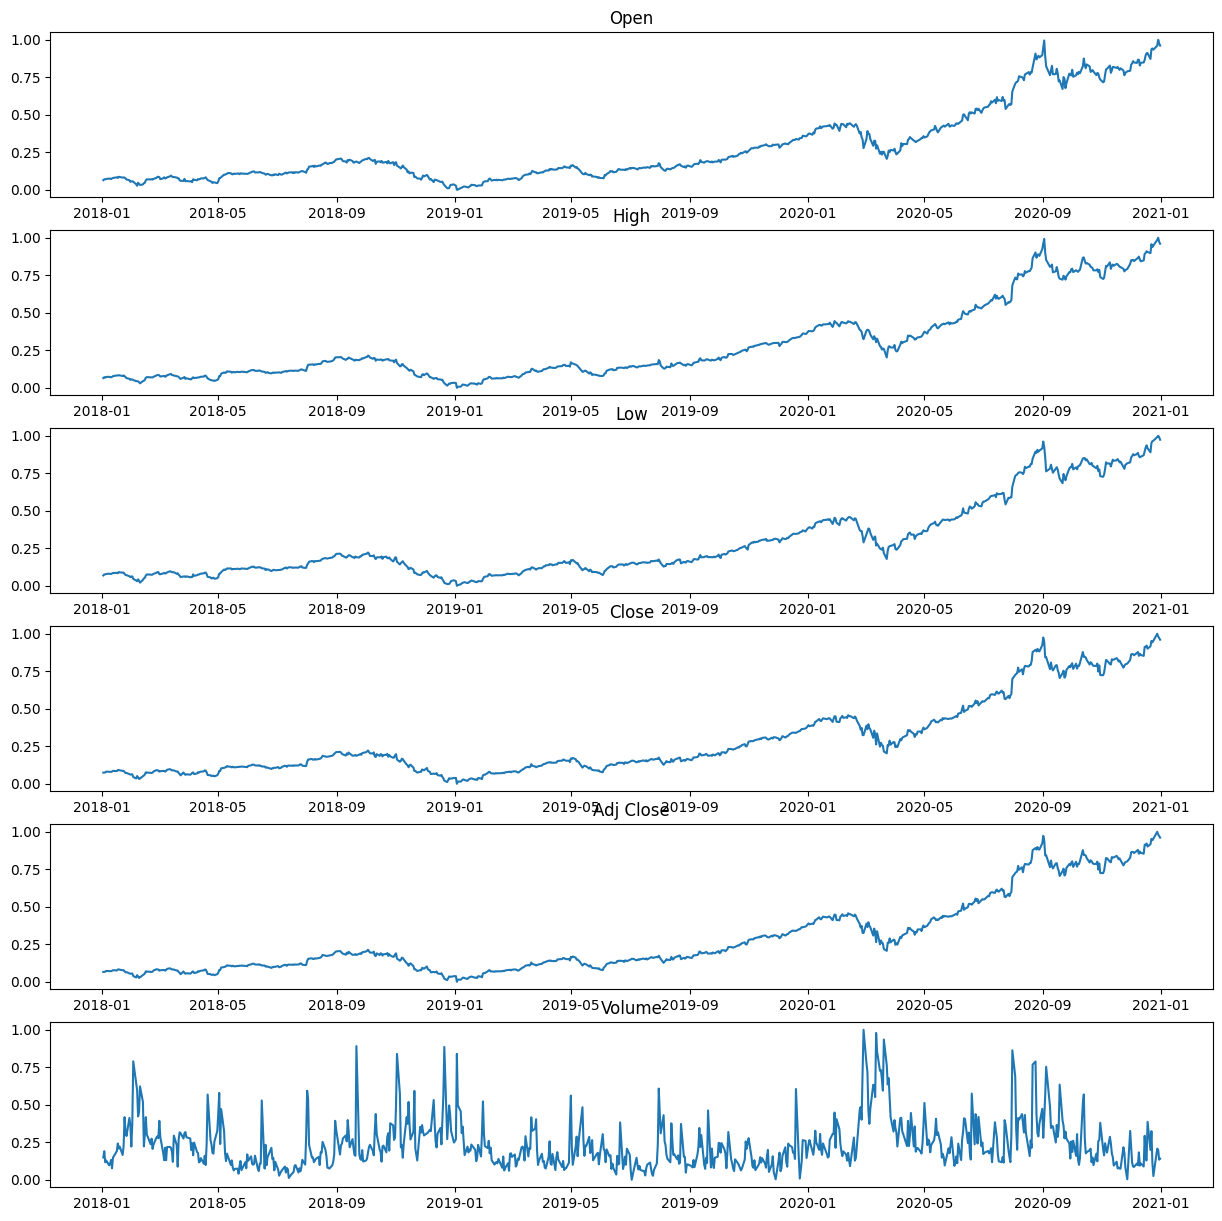

In [77]:
plt.rcParams['figure.figsize'] = [15, 15]
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_scaled.columns):
  ax.plot(df_scaled[col])
  ax.set_title(col)

Create Window Sequences

In [78]:
def create_sequences(data, window_size):
  X = []
  y = []
  for i in range(window_size, len(data)):
    X.append(data.iloc[i-window_size:i].values)
    y.append(data.iloc[i].values)
  return np.array(X), np.array(y)

In [79]:
window_size = 60
X, y = create_sequences(df_scaled, window_size)

In [80]:
X.shape, y.shape

((696, 60, 6), (696, 6))

In [81]:
X #Contain 60 in each list#

array([[[0.0641321 , 0.06491795, 0.06894981, 0.07432581, 0.06590886,
         0.14899308],
        [0.06993779, 0.07041326, 0.07577906, 0.07425165, 0.06583805,
         0.19058211],
        [0.06996226, 0.0677755 , 0.07608256, 0.07622907, 0.06772554,
         0.11622886],
        ...,
        [0.05901232, 0.06687185, 0.06181709, 0.07558642, 0.06877409,
         0.27480253],
        [0.07275487, 0.07187865, 0.06303116, 0.06463651, 0.05827953,
         0.31029701],
        [0.05700358, 0.05934937, 0.05865542, 0.06003903, 0.05387328,
         0.31812671]],

       [[0.06993779, 0.07041326, 0.07577906, 0.07425165, 0.06583805,
         0.19058211],
        [0.06996226, 0.0677755 , 0.07608256, 0.07622907, 0.06772554,
         0.11622886],
        [0.07216699, 0.07241598, 0.07853603, 0.08109844, 0.07237343,
         0.12909185],
        ...,
        [0.07275487, 0.07187865, 0.06303116, 0.06463651, 0.05827953,
         0.31029701],
        [0.05700358, 0.05934937, 0.05865542, 0.06003903, 0.053

Train. Test. Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
#check data in X train#
X_train.shape

(556, 60, 6)

Build the LSTM model

In [88]:
model = keras.Sequential([
    #add the first layer#
    keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

        #add the second layer#
    keras.layers.LSTM(units = 50, return_sequences = True),
    keras.layers.Dropout(0.3),

        #add the third layer#
    keras.layers.LSTM(units = 50, return_sequences = False),
    keras.layers.Dropout(0.3),

#adding output layer#
    keras.layers.Dense(y_train.shape[1])

])
#add the first layer#


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
#Complilation#
model.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])


In [93]:
#Early stopping#
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

In [94]:
lstm_model = model.fit(X_train, y_train,
                       validation_split = 0.2,
                       epochs = 100,
                       batch_size = 3,
                       callbacks = [early_stopping])


Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - RootMeanSquaredError: 0.1953 - loss: 0.0429 - val_RootMeanSquaredError: 0.0841 - val_loss: 0.0071
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - RootMeanSquaredError: 0.1136 - loss: 0.0130 - val_RootMeanSquaredError: 0.0845 - val_loss: 0.0071
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - RootMeanSquaredError: 0.1030 - loss: 0.0107 - val_RootMeanSquaredError: 0.0813 - val_loss: 0.0066
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - RootMeanSquaredError: 0.1022 - loss: 0.0105 - val_RootMeanSquaredError: 0.0712 - val_loss: 0.0051
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - RootMeanSquaredError: 0.0847 - loss: 0.0072 - val_RootMeanSquaredError: 0.0925 - val_loss: 0.0086
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - RootMeanSquaredError: 0.0885 - loss: 0.0079 - val_RootMeanSquaredError: 0.0700 - val_loss: 0.0049
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - RootMeanSquaredEr

In [95]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


Forecast the Data

In [96]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

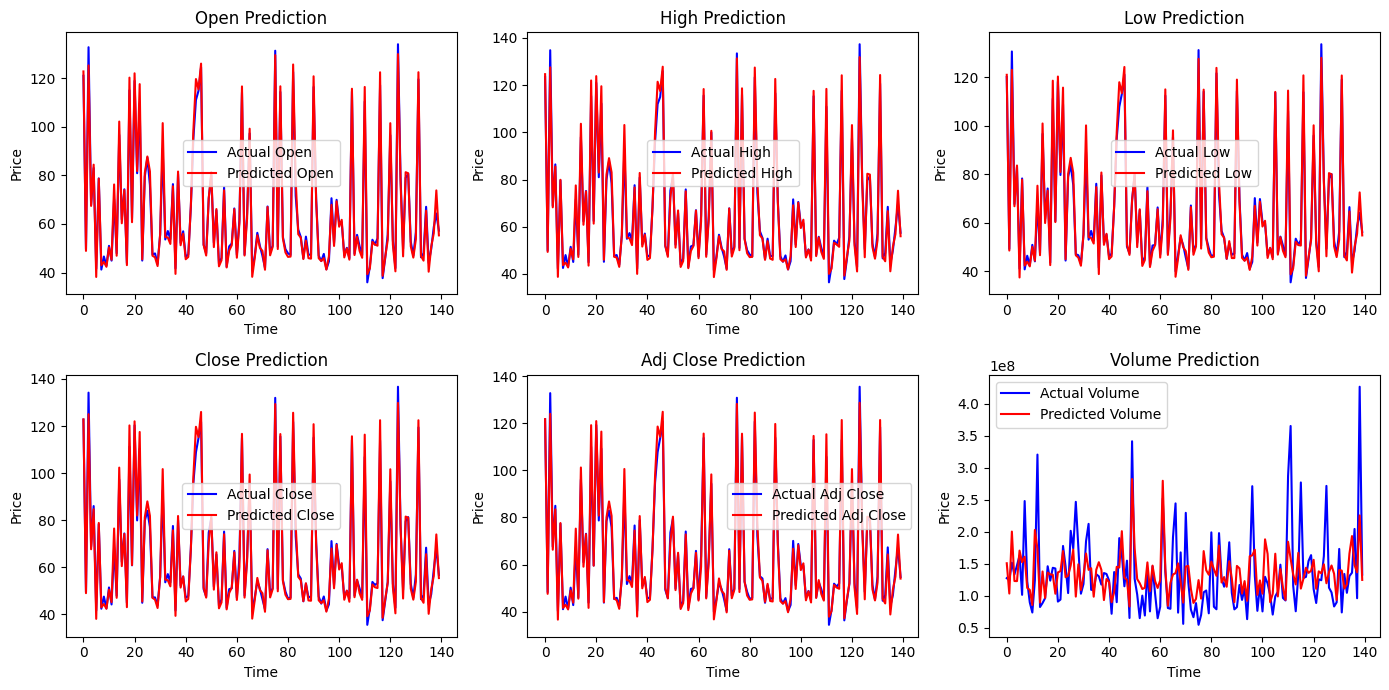

In [98]:
#Plot the results#
plt.figure(figsize = (14, 7))

for i , col in enumerate(df_scaled.columns):
  plt.subplot(2, 3, i+1)
  plt.plot(y_test_rescaled[:,i], color = 'blue', label = f'Actual {col}')
  plt.plot(predictions[:, i], color = 'red', label = f'Predicted {col}')
  plt.title(f'{col} Prediction')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()

  plt.tight_layout()
